In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import math
import time

In [21]:
path = "C:/Users/user/Desktop/HASADNA/involved_markers_hebrew.csv"
print(path)

C:/Users/user/Desktop/HASADNA/involved_markers_hebrew.csv


In [22]:
df = pd.read_csv(path)
print(df.shape)

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1678965, 136)


In [6]:
print(*df.columns,sep="\n")

accident_id
provider_and_id
provider_code
involved_type
involved_type_hebrew
license_acquiring_date
age_group
age_group_hebrew
sex
sex_hebrew
vehicle_type
vehicle_type_hebrew
safety_measures
safety_measures_hebrew
involve_yishuv_symbol
involve_yishuv_name
injury_severity
injury_severity_hebrew
injured_type
injured_type_hebrew
injured_position
injured_position_hebrew
population_type
population_type_hebrew
home_region
home_region_hebrew
home_district
home_district_hebrew
home_natural_area
home_natural_area_hebrew
home_municipal_status
home_municipal_status_hebrew
home_residence_type
home_residence_type_hebrew
hospital_time
hospital_time_hebrew
medical_type
medical_type_hebrew
release_dest
release_dest_hebrew
safety_measures_use
safety_measures_use_hebrew
late_deceased
late_deceased_hebrew
car_id
involve_id
accident_year
accident_month
injury_severity_mais
injury_severity_mais_hebrew
accident_timestamp
accident_type
accident_type_hebrew
accident_severity
accident_severity_hebrew
location_

In [7]:
#print(df.accident_yishuv_name.head(5),df.accident_yishuv_symbol.head(5))
#print(df.accident_yishuv_name[10:20],df.accident_yishuv_symbol[10:20])
print(*pd.unique(df.accident_yishuv_name),sep="\n")

חיפה
קריית אתא
nan
רחובות
ראשון לציון
עפולה
טבריה
אום אל-פחם
כפר קרע
תל אביב -יפו
רמת גן
אילת
נצרת
חריש
באר שבע
חולון
אשדוד
אשקלון
בני ברק
בת ים
קדומים
טירה
כפר סבא
נתניה
ירושלים
שוהם
ראש העין
חדרה
אור עקיבא
ירכא
סח'נין
מג'ד אל-כרום
צפת
פתח תקווה
לוד
ריינה
מבשרת ציון
קריית אונו
הרצלייה
זכרון יעקב
קריית מוצקין
קריית ים
רכסים
שפרעם
בית שאן
אבן יהודה
מודיעין-מכבים-רעות*
נתיבות
תל שבע
דימונה
גבעתיים
מעלה אדומים
קריית גת
תל מונד
באר יעקב
רמת השרון
יבנה
רעננה
רמלה
פורייה - נווה עובד
כפר יונה
נשר
ג'סר א-זרקא
קריית שמונה
באקה אל-גרביה
פרדס חנה-כרכור
משהד
רהט
כאוכב אבו אל-היג'א
יהוד
כורזים
ג'דיידה-מכר
הוד השרון
כרמיאל
עומר
טורעאן
קריית ביאליק
בית דגן
נצרת עילית
בית שמש
פקיעין (בוקייעה)
כפר תבור
כפר יאסיף
מעלות-תרשיחא
בנימינה-גבעת עדה*
אור יהודה
מזכרת בתיה
שדרות
טייבה
נס ציונה
בועיינה-נוג'ידאת
דייר אל-אסד
בית ג'ן
דייר חנא
קדרים
עלי
עכו
כוכב יעקב
קריית טבעון
טירת כרמל
עראבה
נהרייה
עמוקה
טמרה
כפר ברוך
מגדל העמק
מגדל
גני תקווה
רוחמה
בני עי"ש
צור נתן
כפר קאסם
קדימה-צורן
שריגים (לי-און)
בסמת טבעון
סא

## Lets make a function to make and plot DBscan results for any city and in any epsilon

In [8]:
def DBscan_city_eps(df=df,city_name="תל אביב -יפו",eps=50,min_clust=6):
    ## Prepare the data by taking only accidents from the desired city since 2017, and clean duplicates
    city_inds = np.where((df.accident_year > 2015) & (df.involved_type == 3) & (df.accident_yishuv_name == city_name ) & df.location_accuracy == 1)[0]
    #print("In {0} there are {1} accidents since 2016".format(city_name,len(city_inds)))
    city_accitents = df.loc[city_inds,['accident_id','x','y','longitude','latitude']]
    print('number of accidents in {0} is: {1}'.format(city_name,city_accitents.shape[0]))
    city_accitents.drop_duplicates(subset = 'accident_id',keep = 'first', inplace = True)
    print('number of accidents in {0} after filtering for duplicates is: {1}'.format(city_name,city_accitents.shape[0]))
    ## make the DBscan
    db = DBSCAN(eps=eps, min_samples=min_clust).fit(city_accitents[['x','y']].values)
    ## Filter the accidents that are not clustered
    data2plot = city_accitents.iloc[(db.labels_ != -1) ,]
    ## Define colors for each cluster
    colors = db.labels_[db.labels_ != -1]
    ## plot!!!
    plt.scatter(data2plot.x,data2plot.y,c=colors,s=1,cmap='tab20')
    plt.title(label="City {0}\neps = {1}\nMinimal cluster size is {2}".format(city_name,eps,min_clust))

## Example of clustering with high epsilon
This one basically put all the accidents in one cluster

number of accidents in עפולה is: 245
number of accidents in עפולה after filtering for duplicates is: 179


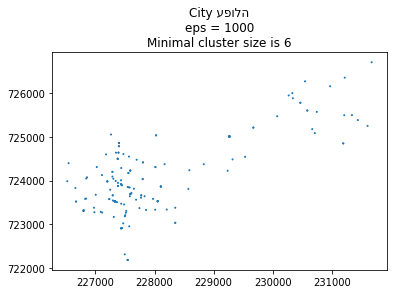

In [9]:
DBscan_city_eps(df=df,city_name="עפולה",eps=1000,min_clust=6)

## This function plot DBscans with different epsilons

In [9]:
def scan_eps_per_city(df=df,city_name="עפולה",eps_range=[20,50,100,200,500,1000],min_clust=6):
    plt.figure(figsize=(15,10))
    for i,eps in enumerate(eps_range):    
        plt.subplot(2,3,i+1)
        DBscan_city_eps(df=df,city_name=city_name,eps=eps,min_clust=6)

### Afula

number of accidents in עפולה is: 245
number of accidents in עפולה after filtering for duplicates is: 179
number of accidents in עפולה is: 245
number of accidents in עפולה after filtering for duplicates is: 179
number of accidents in עפולה is: 245
number of accidents in עפולה after filtering for duplicates is: 179
number of accidents in עפולה is: 245
number of accidents in עפולה after filtering for duplicates is: 179
number of accidents in עפולה is: 245
number of accidents in עפולה after filtering for duplicates is: 179
number of accidents in עפולה is: 245
number of accidents in עפולה after filtering for duplicates is: 179


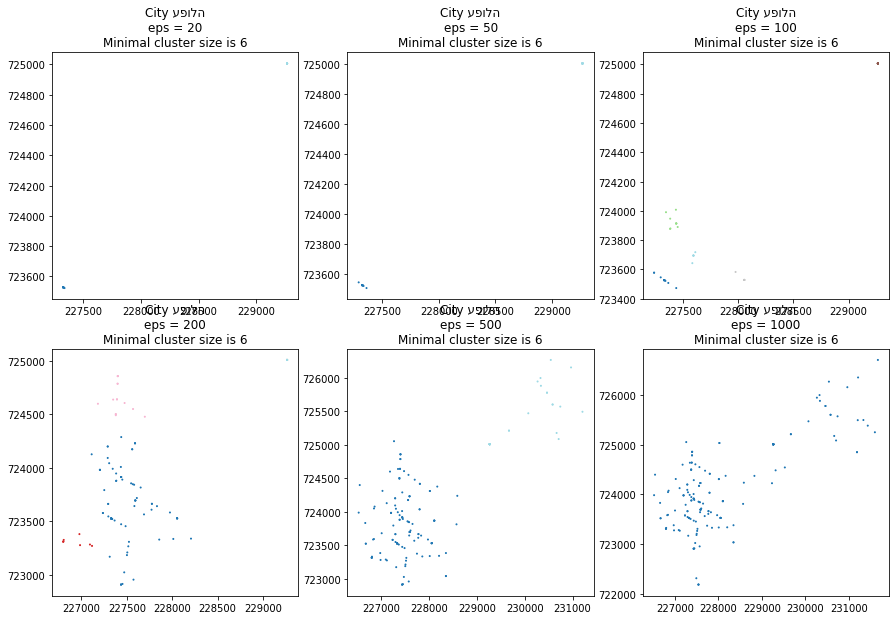

In [10]:
scan_eps_per_city(city_name="עפולה")

### Ashkelon

number of accidents in אשקלון is: 1498
number of accidents in אשקלון after filtering for duplicates is: 1173
number of accidents in אשקלון is: 1498
number of accidents in אשקלון after filtering for duplicates is: 1173
number of accidents in אשקלון is: 1498
number of accidents in אשקלון after filtering for duplicates is: 1173
number of accidents in אשקלון is: 1498
number of accidents in אשקלון after filtering for duplicates is: 1173
number of accidents in אשקלון is: 1498
number of accidents in אשקלון after filtering for duplicates is: 1173
number of accidents in אשקלון is: 1498
number of accidents in אשקלון after filtering for duplicates is: 1173


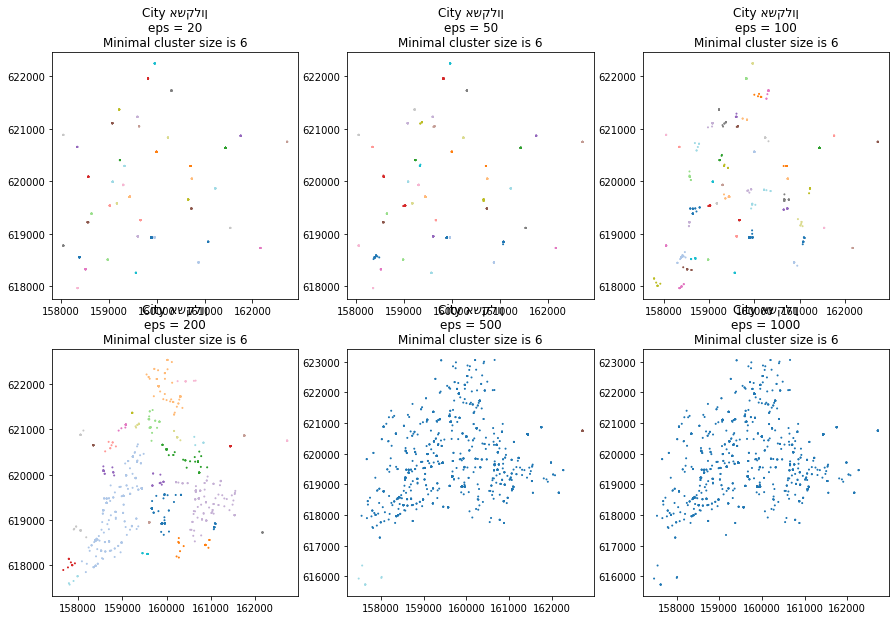

In [11]:
scan_eps_per_city(city_name="אשקלון")

### Haifa

number of accidents in חיפה is: 3124
number of accidents in חיפה after filtering for duplicates is: 2419
number of accidents in חיפה is: 3124
number of accidents in חיפה after filtering for duplicates is: 2419
number of accidents in חיפה is: 3124
number of accidents in חיפה after filtering for duplicates is: 2419
number of accidents in חיפה is: 3124
number of accidents in חיפה after filtering for duplicates is: 2419
number of accidents in חיפה is: 3124
number of accidents in חיפה after filtering for duplicates is: 2419
number of accidents in חיפה is: 3124
number of accidents in חיפה after filtering for duplicates is: 2419


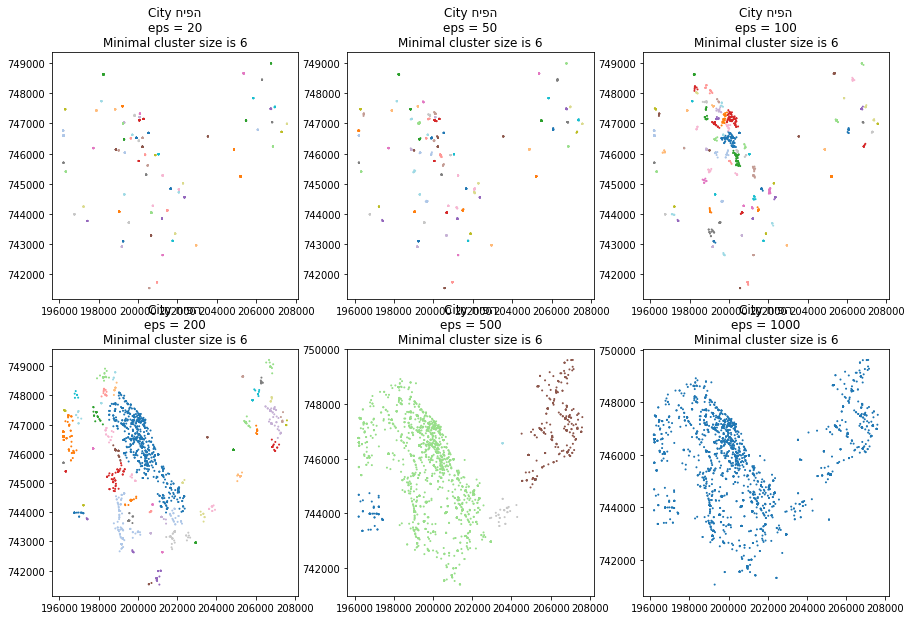

In [26]:
scan_eps_per_city(city_name="חיפה")

### Jerusalem

number of accidents in ירושלים is: 6587
number of accidents in ירושלים after filtering for duplicates is: 5410
number of accidents in ירושלים is: 6587
number of accidents in ירושלים after filtering for duplicates is: 5410
number of accidents in ירושלים is: 6587
number of accidents in ירושלים after filtering for duplicates is: 5410
number of accidents in ירושלים is: 6587
number of accidents in ירושלים after filtering for duplicates is: 5410
number of accidents in ירושלים is: 6587
number of accidents in ירושלים after filtering for duplicates is: 5410
number of accidents in ירושלים is: 6587
number of accidents in ירושלים after filtering for duplicates is: 5410


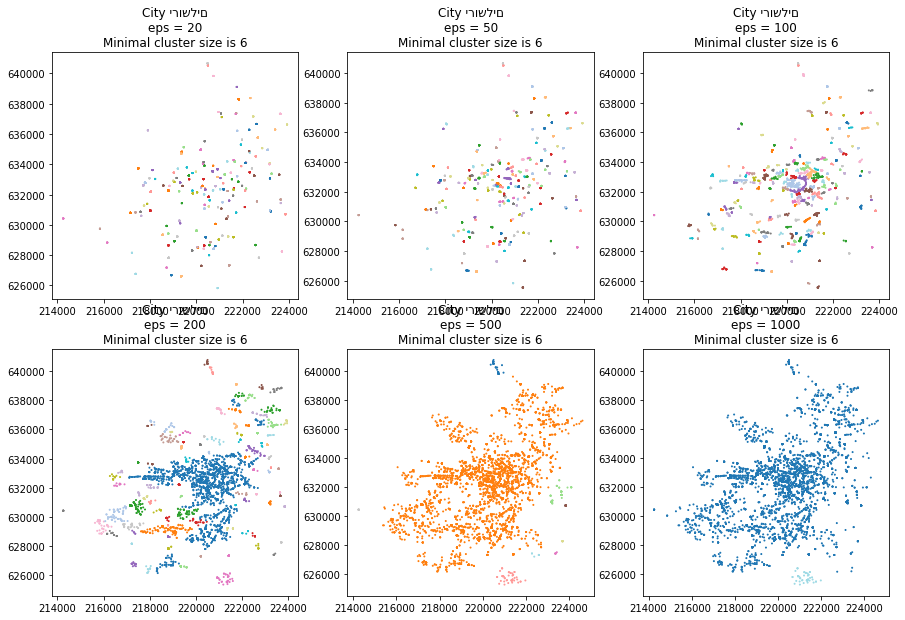

In [13]:
scan_eps_per_city(city_name="ירושלים",min_clust=15)

### Tel Aviv

number of accidents in תל אביב -יפו is: 5108
number of accidents in תל אביב -יפו after filtering for duplicates is: 4524
number of accidents in תל אביב -יפו is: 5108
number of accidents in תל אביב -יפו after filtering for duplicates is: 4524
number of accidents in תל אביב -יפו is: 5108
number of accidents in תל אביב -יפו after filtering for duplicates is: 4524
number of accidents in תל אביב -יפו is: 5108
number of accidents in תל אביב -יפו after filtering for duplicates is: 4524
number of accidents in תל אביב -יפו is: 5108
number of accidents in תל אביב -יפו after filtering for duplicates is: 4524
number of accidents in תל אביב -יפו is: 5108
number of accidents in תל אביב -יפו after filtering for duplicates is: 4524
time it takes to run 6 DBscan for TLV is:  2.575551986694336 seconds


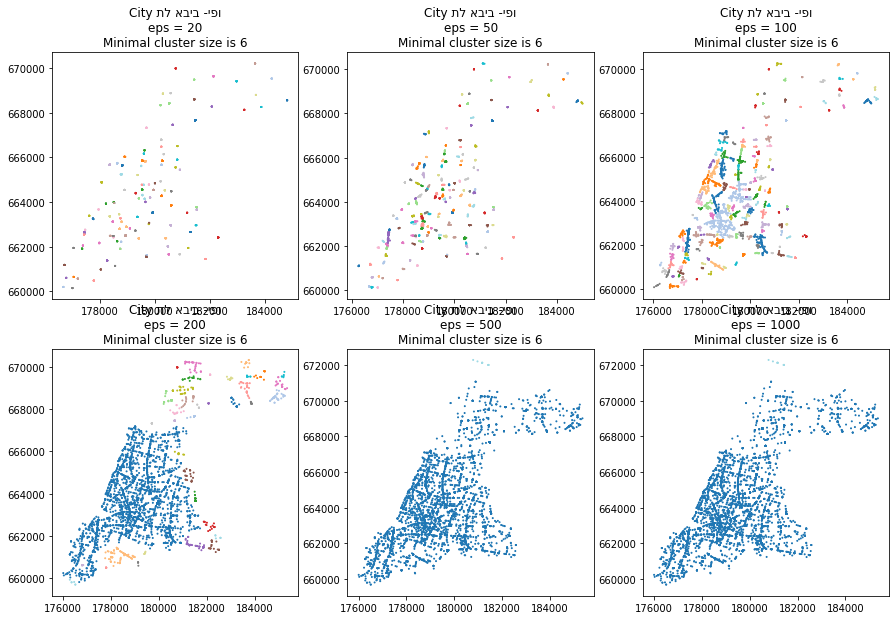

In [23]:
t0 = time.time()
scan_eps_per_city(city_name="תל אביב -יפו")
print("time it takes to run 6 DBscan for TLV is: ",time.time()-t0,"seconds")